1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [7]:
##!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2022-11-26 17:16:35--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/aamg1apjhclecka/regression_generated.csv [segue]
--2022-11-26 17:16:36--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc23bd59b038188820059168424b.dl.dropboxusercontent.com/cd/0/inline/BxdC_Io3_Ll1gmB4464MvUjtxyvfJ9KiwiRyfYzvRFhp0xCGzki5warVQTGUGRd6E77ViZEGn5wtANy4_OCnI_z_JZihzuQ97bj5PnJayzybf60oY6llls2AdWvyXAfY5H9oUK6hXHuf_6r8lqF3xspeU9gsN7ib5vAiFB9XxFzN-A/file# [segue]
--2022-11-26 17:16:36--  https://uc23bd59b038188820059168424b.dl.dropboxusercontent.com/cd/0/inline/BxdC_Io3_Ll1gmB

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import scipy 


Plotting all the possible combinations between the 3 features:



<AxesSubplot:xlabel='features_2', ylabel='features_3'>

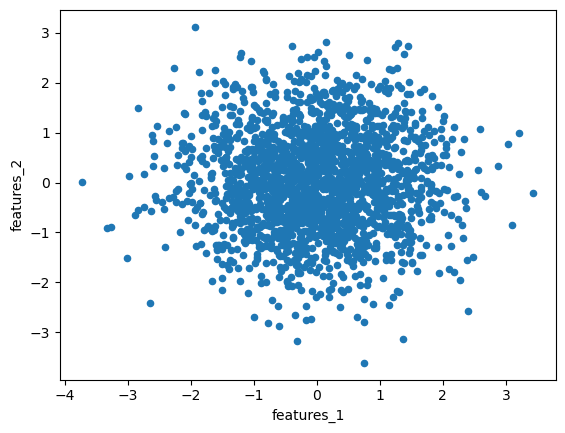

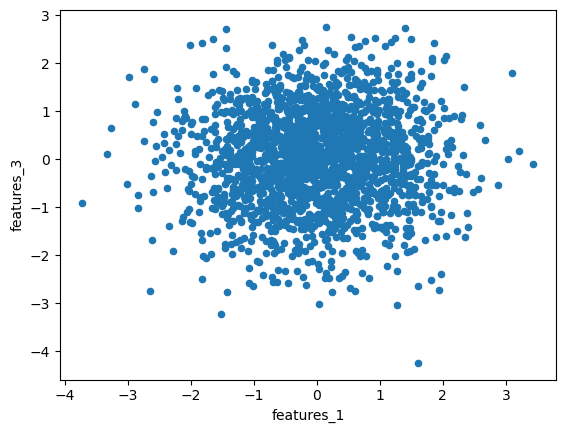

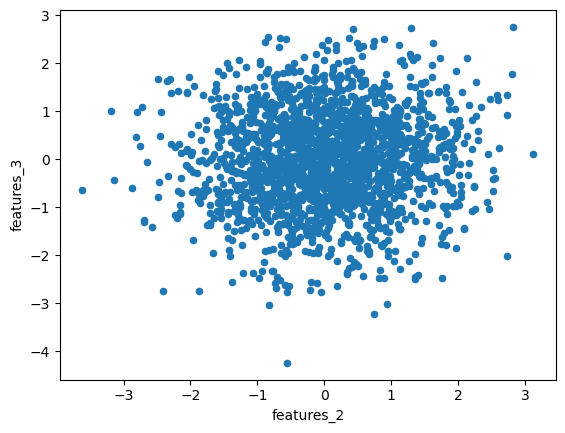

In [4]:
dataset= pd.read_csv("regression_generated.csv")
print("Plotting all the possible combinations between the 3 features:\n")
dataset.plot.scatter(x = "features_1", y = "features_2")
dataset.plot.scatter(x = "features_1", y = "features_3")
dataset.plot.scatter(x = "features_2", y = "features_3")

## the 3 features are not correlated, their scatter plot behave in a random way


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

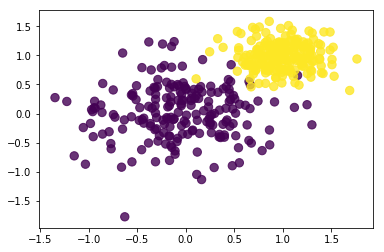

In [5]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

Text(0, 0.5, 'y')

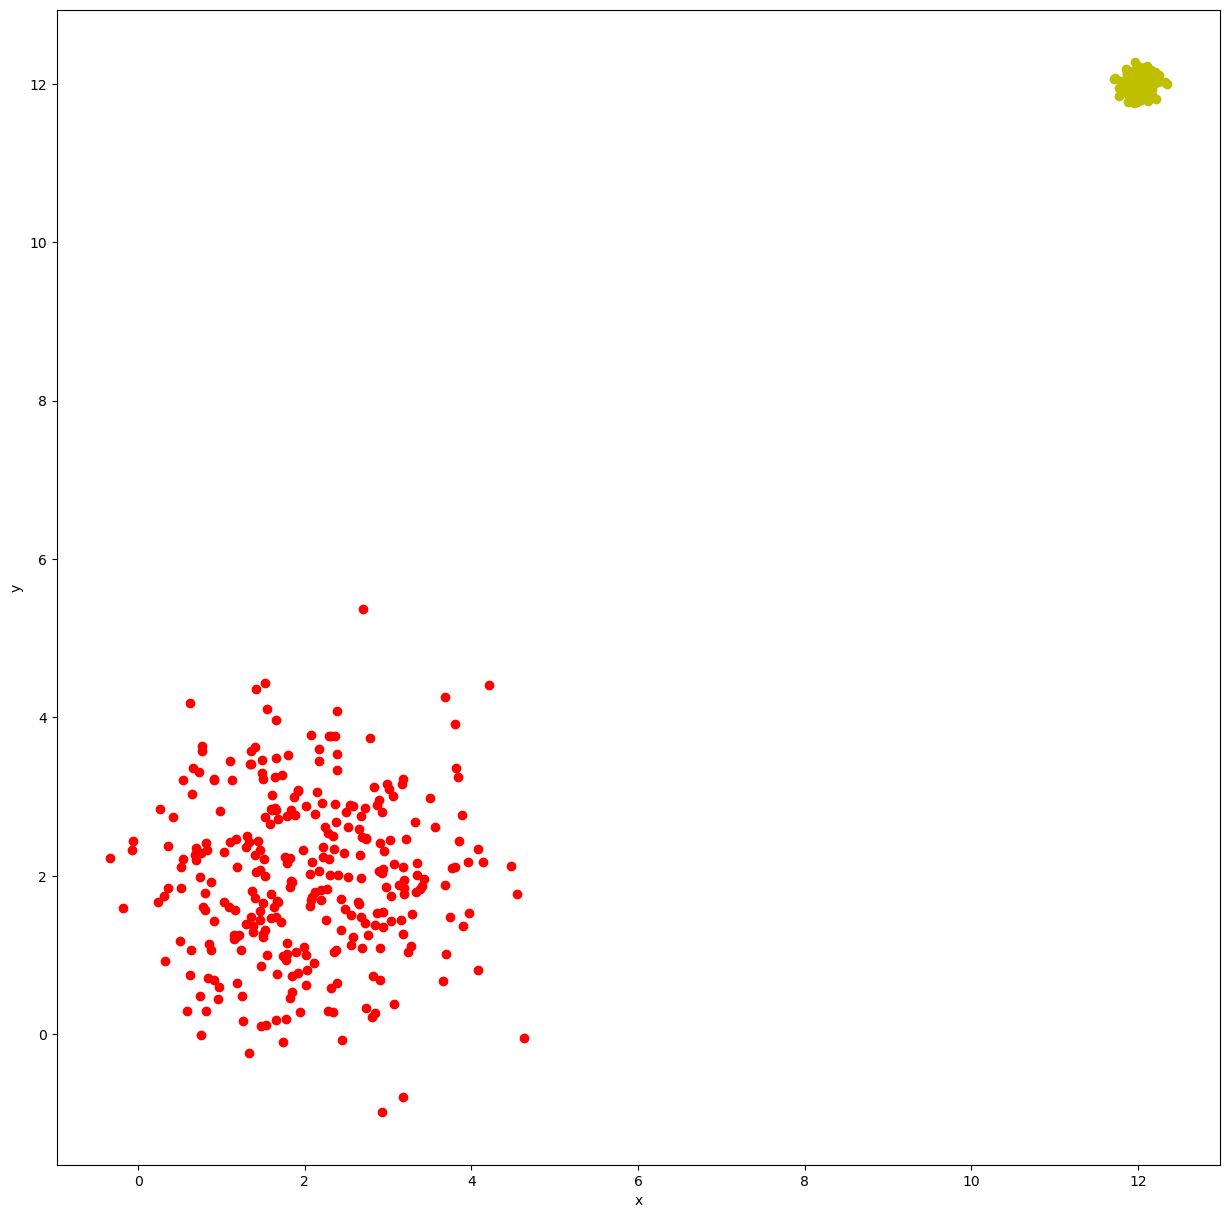

In [6]:
def random_dataset(mean,std_dev,length):    
    return (np.random.normal(mean,std_dev,(length,2)))

figure,ax=plt.subplots(figsize=(15,15))
set_1=random_dataset(2,1,300)
set_2=random_dataset(12,0.1,300)

ax.scatter(set_1[:,0],set_1[:,1],c='r')
ax.scatter(set_2[:,0],set_2[:,1],c='y')
ax.set_xlabel("x")
ax.set_ylabel("y")




3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
##!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [8]:
input_file = open("./data/residuals_261.pkl", "rb") ##read binary
file = pickle.load(input_file)
input_file.close()

my_entries = pd.DataFrame(file.tolist())
my_entries = my_entries[abs(my_entries["residuals"])<2]
print("The entries that i want to pick are:\n",my_entries)


The entries that i want to pick are:
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


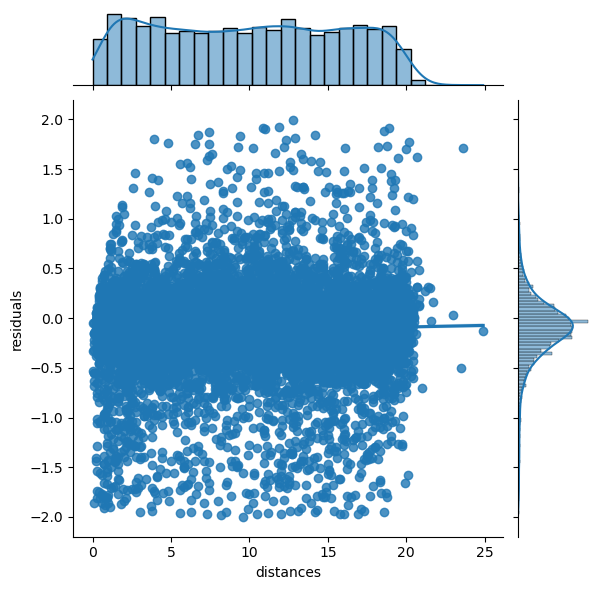

In [9]:
sns.jointplot(x = "distances", y = "residuals", data = my_entries,kind="reg")

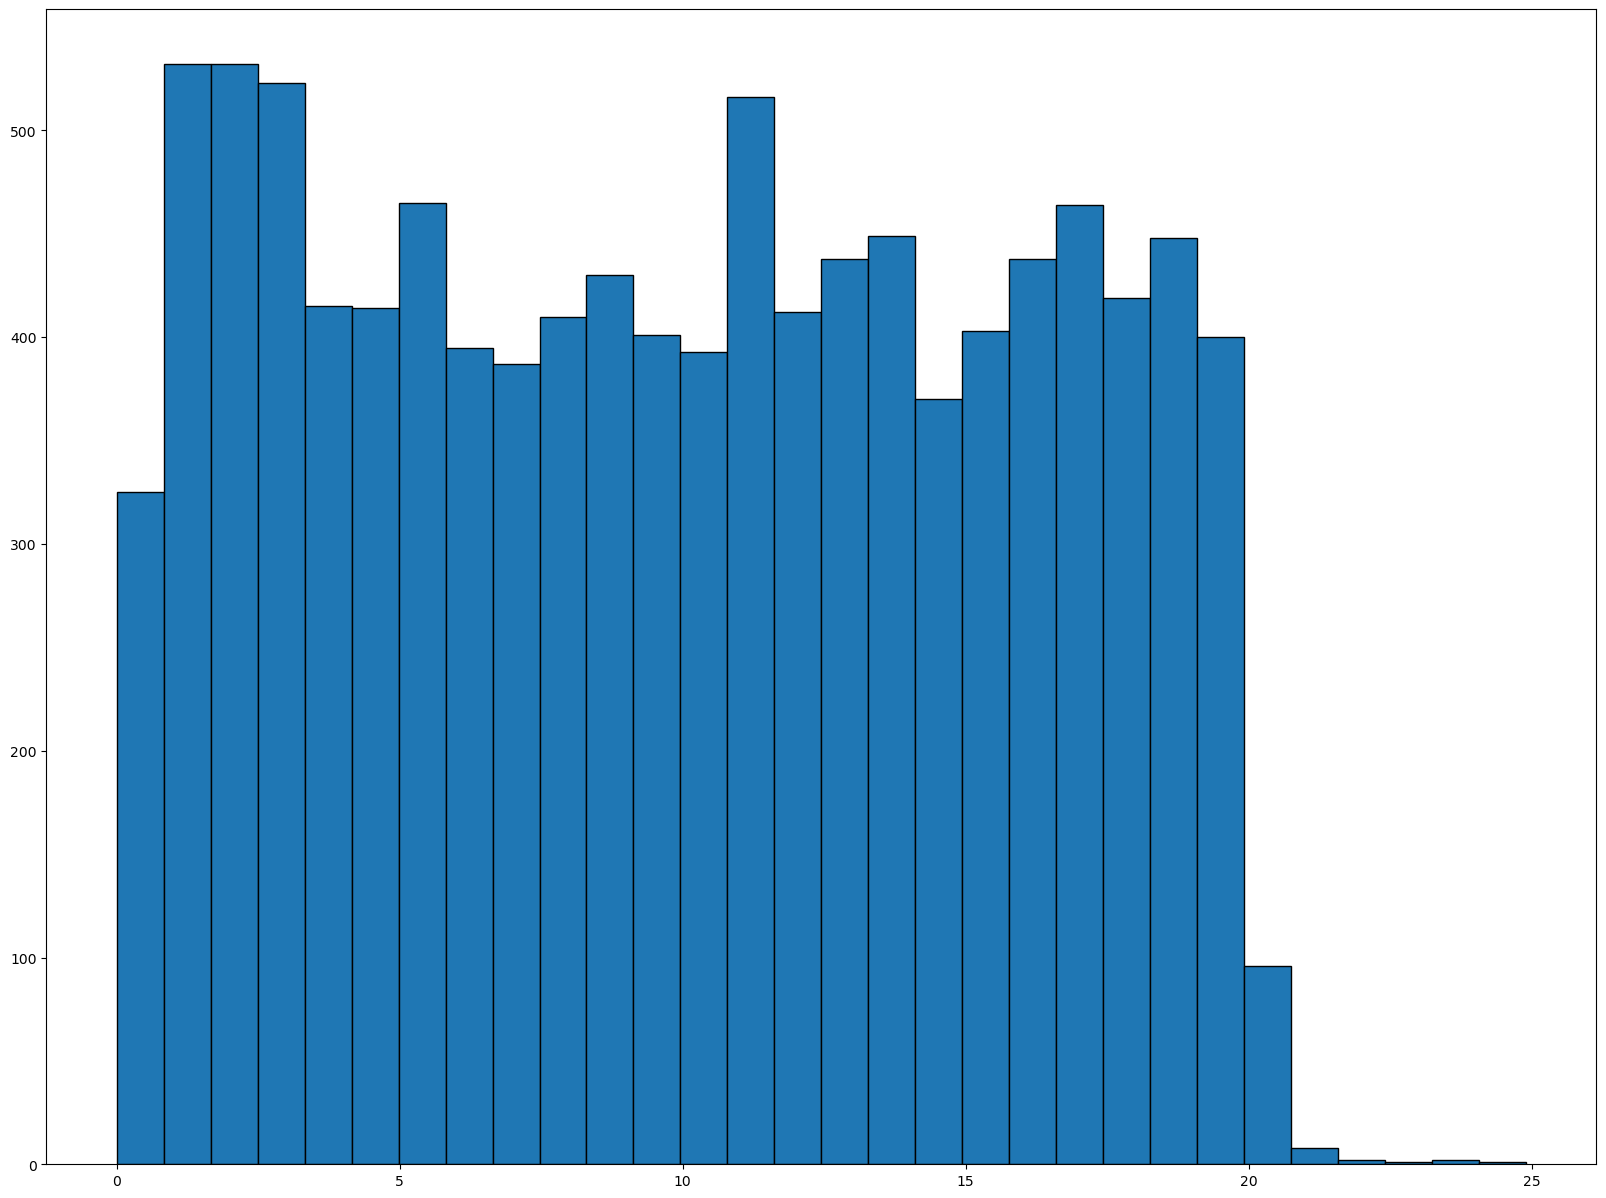

In [21]:
##second part of the excersise
distances = my_entries["distances"].to_numpy() 
n_bins = 30 ##number of bins
figure, ax = plt.subplots(1,figsize=(20,15))
n,edges,_ = ax.hist(distances,bins = n_bins,edgecolor = "black")

Text(0, 0.5, 'residuals')

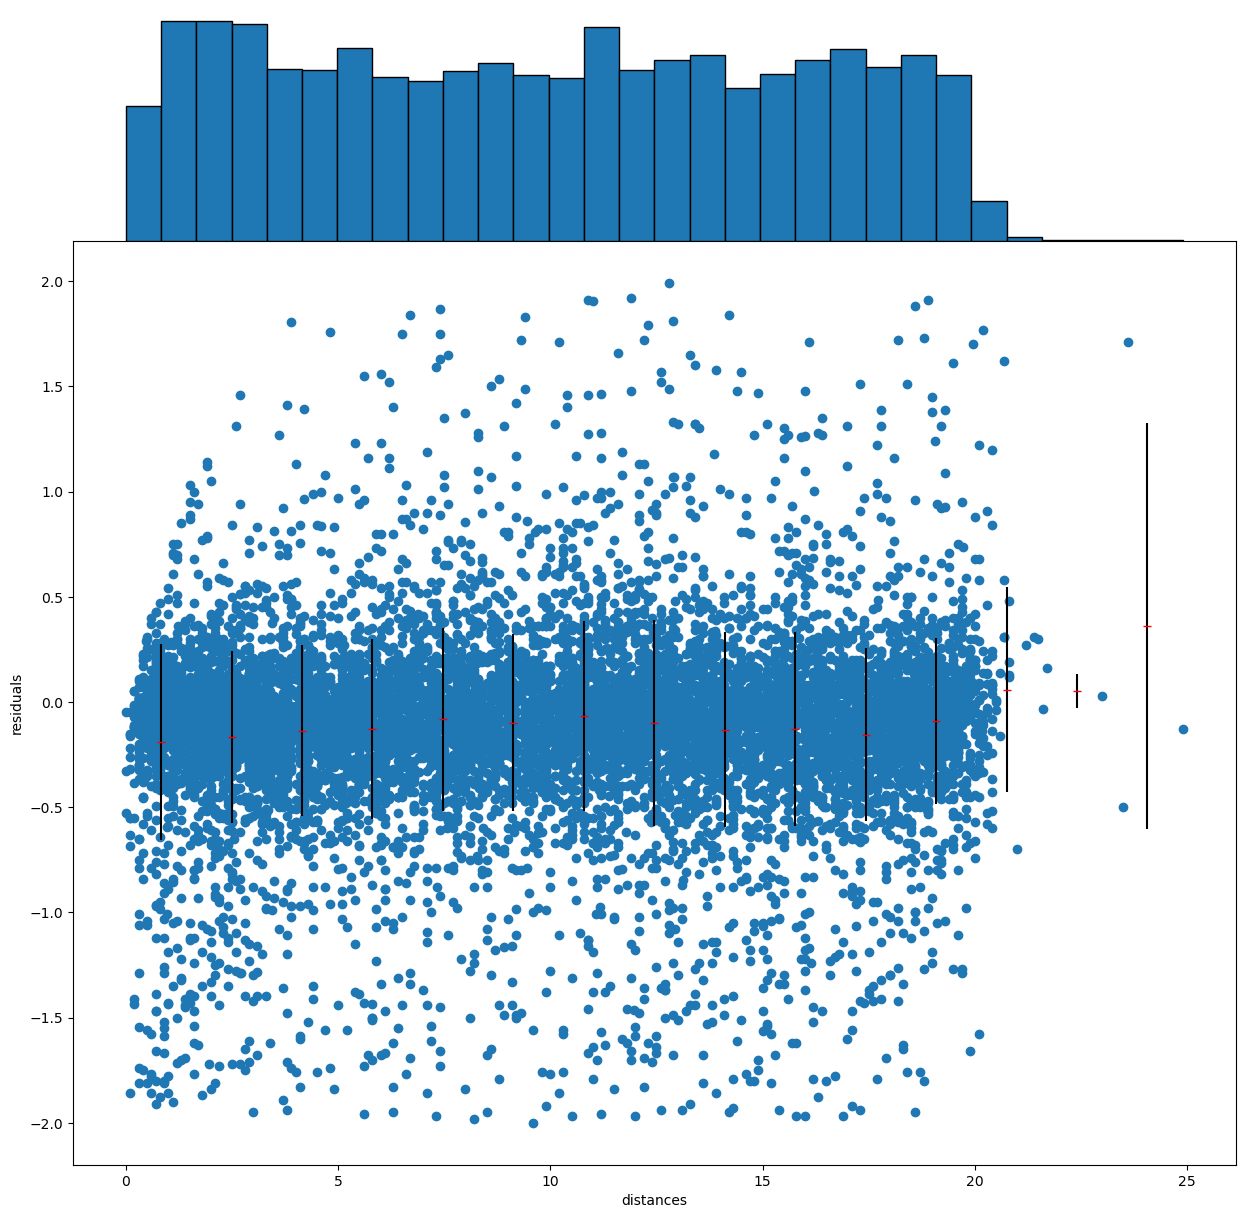

In [22]:
x=[]
y=[]
err_y=[]
for i in range(1,len(bins)):
    temp = my_entries[(my_entries["distances"]>bins[i-1]) & (my_entries["distances"]<=bins[i])]["residuals"].values
    if(len(temp) > 0):
        x.append((bins[i]+bins[i-1])/2)
        y.append(np.mean(temp))
        err_y.append(np.std(temp)) ##creating the arrays as defined in the ex request
        
fig = plt.figure(figsize=(15,15))
grid = fig.add_gridspec(2,1,hspace=0,height_ratios=(1, 4)) ##empty gridspace

ax_scatter = fig.add_subplot(grid[1])
ax_hist = fig.add_subplot(grid[0], sharex=ax_scatter)

_,bins_edges,_=ax_hist.hist(distances,bins = n_bins,edgecolor = "black") ##plotting hist on top pf the scatter plot
ax_hist.axis("off")

ax_scatter.errorbar(x,y,err_y,fmt="_",ecolor="k",color="r")
ax_scatter.scatter(y=my_entries["residuals"],x=my_entries["distances"]) ##plotting scatter plot
ax_scatter.set_xlabel("distances")
ax_scatter.set_ylabel("residuals")





4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


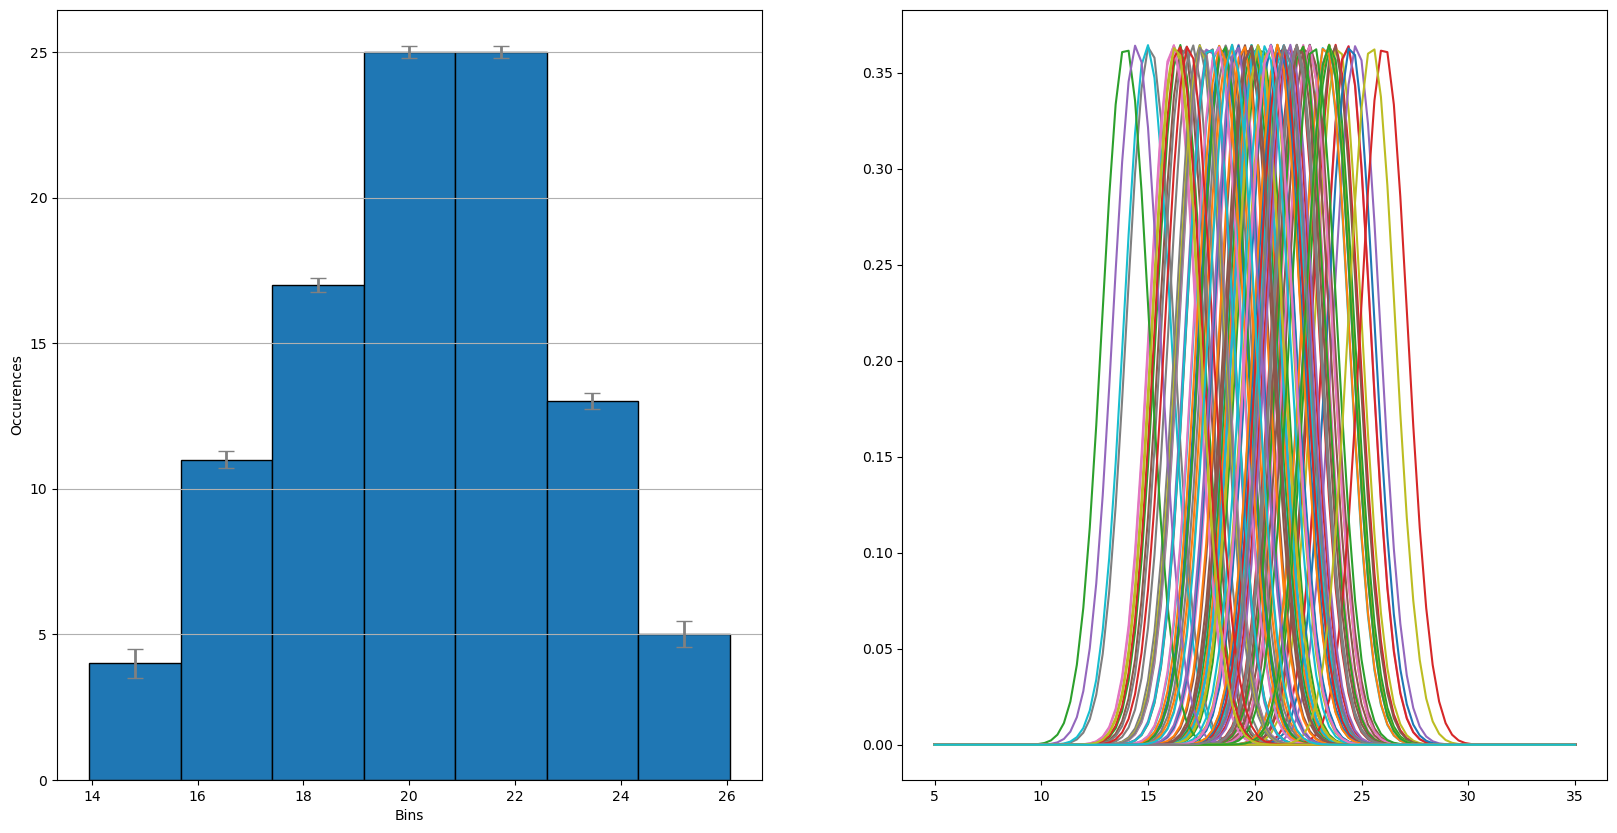

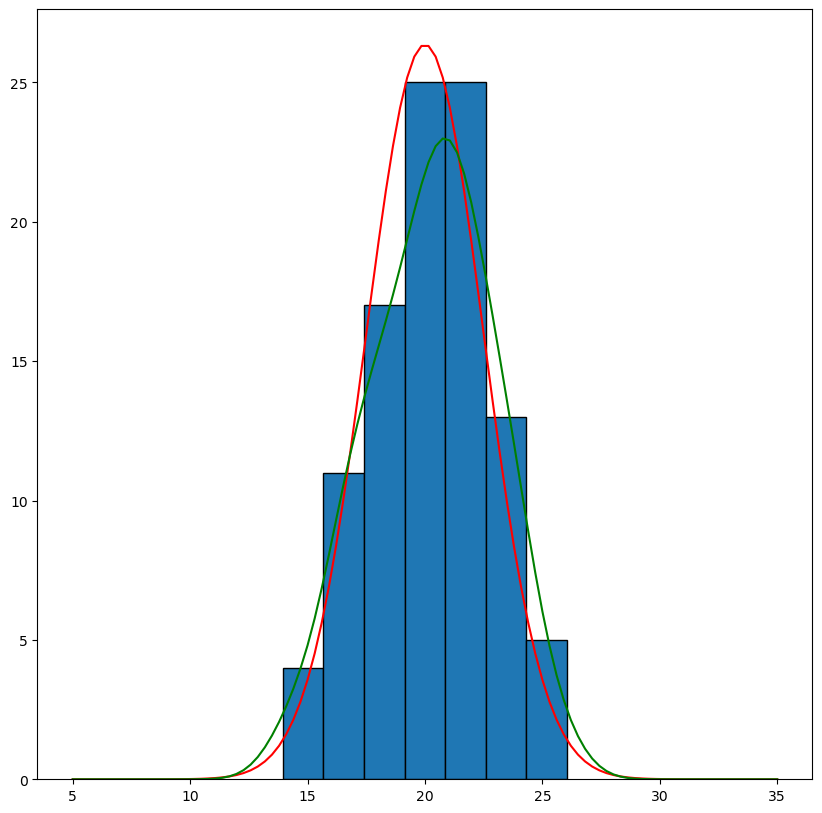

In [11]:
x = np.random.normal(20, 2.5, 100)
fig, axs = plt.subplots(nrows=1, ncols= 2, figsize=(20,10))
num_bin = (x.max() - x.min())/(2*scipy.stats.iqr(x) / (len(x)**(1/3))) ##same procedure as previous excercise
y,bin_edges,_ = axs[0].hist(x,int(num_bin),edgecolor="black")
centres = (bin_edges[:-1] + bin_edges[1:])/2 ##applying the definition
error = 1/np.sqrt(y)
axs[0].errorbar(centres, y, yerr=error, fmt="none", c="grey", linewidth=2, capsize=6)
axs[0].set_xlabel("Bins")
axs[0].set_ylabel("Occurences")
axs[0].yaxis.grid()
new_std = 1.06 * np.std(x) * (len(x)**(-1/5))
pdf_sum = np.zeros((100)) ##array full of zeros
space = np.linspace(5, 35, 100)
for m in x:
    pdf = scipy.stats.norm.pdf(space, m, new_std) ## m is the mean of my pdf
    pdf_sum = pdf_sum + pdf
    axs[1].plot(space, pdf)


hist_integral = scipy.integrate.trapz(y,centres)
fig2,ax2 = plt.subplots(figsize = (10,10))
ax2.hist(x,int(num_bin),edgecolor = "black")
my_pdf = scipy.stats.norm.pdf(space, 20, 2.5)
my_integral = scipy.integrate.trapz(my_pdf, space)
my_pdf = my_pdf/ my_integral*hist_integral ##normalizing
ax2.plot(space,my_pdf, c="r") ##plotting in red original normalized PDF

pdf_sum_integral = scipy.integrate.trapz(pdf_sum, space)
pdf_sum = pdf_sum/ pdf_sum_integral*hist_integral    ##same prodecure as before
ax2.plot(space,pdf_sum, c="g") ## plotting the PDF of the sum in the histogram




